# Introduction


**What?** Feature engineering - how to derive new input variables



# Feature engineering


- Often, the input features for a predictive modeling task interact in unexpected and often nonlinear ways. 
- These interactions can be identified and modeled by a learning algorithm. 
- Another approach is to engineer new features that expose these interactions and see if they improve model performance. 
- Additionally, transforms like raising input variables to a power can help to better expose the important relationships between input variables and the target variable.



# Import modules

In [1]:
from numpy import mean, std
from pandas import DataFrame
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20
mpl.rcParams['figure.dpi']= 300

# Polynomial features


- Polynomial features are those features created by raising existing features to an exponent. 
- For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature  (column) where values were calculated by squaring the values in X, e.g. X2.



# Feature engineering

In [2]:
# define the dataset
data = asarray([[2,3],[2,3],[2,3]])
print(data)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]



- The features created include:
- The bias (the value of 1.0)
- Values raised to a power for each degree (e.g. x^1, x^2, x^3, ...)
- Interactions between all pairs of features (e.g. x^1 × x^2, x^1 × x^3, ...)



# Sonar dataset

In [3]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None)
# summarize the shape of the dataset 
print(dataset.shape)
# summarize each variable 
dataset.describe()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


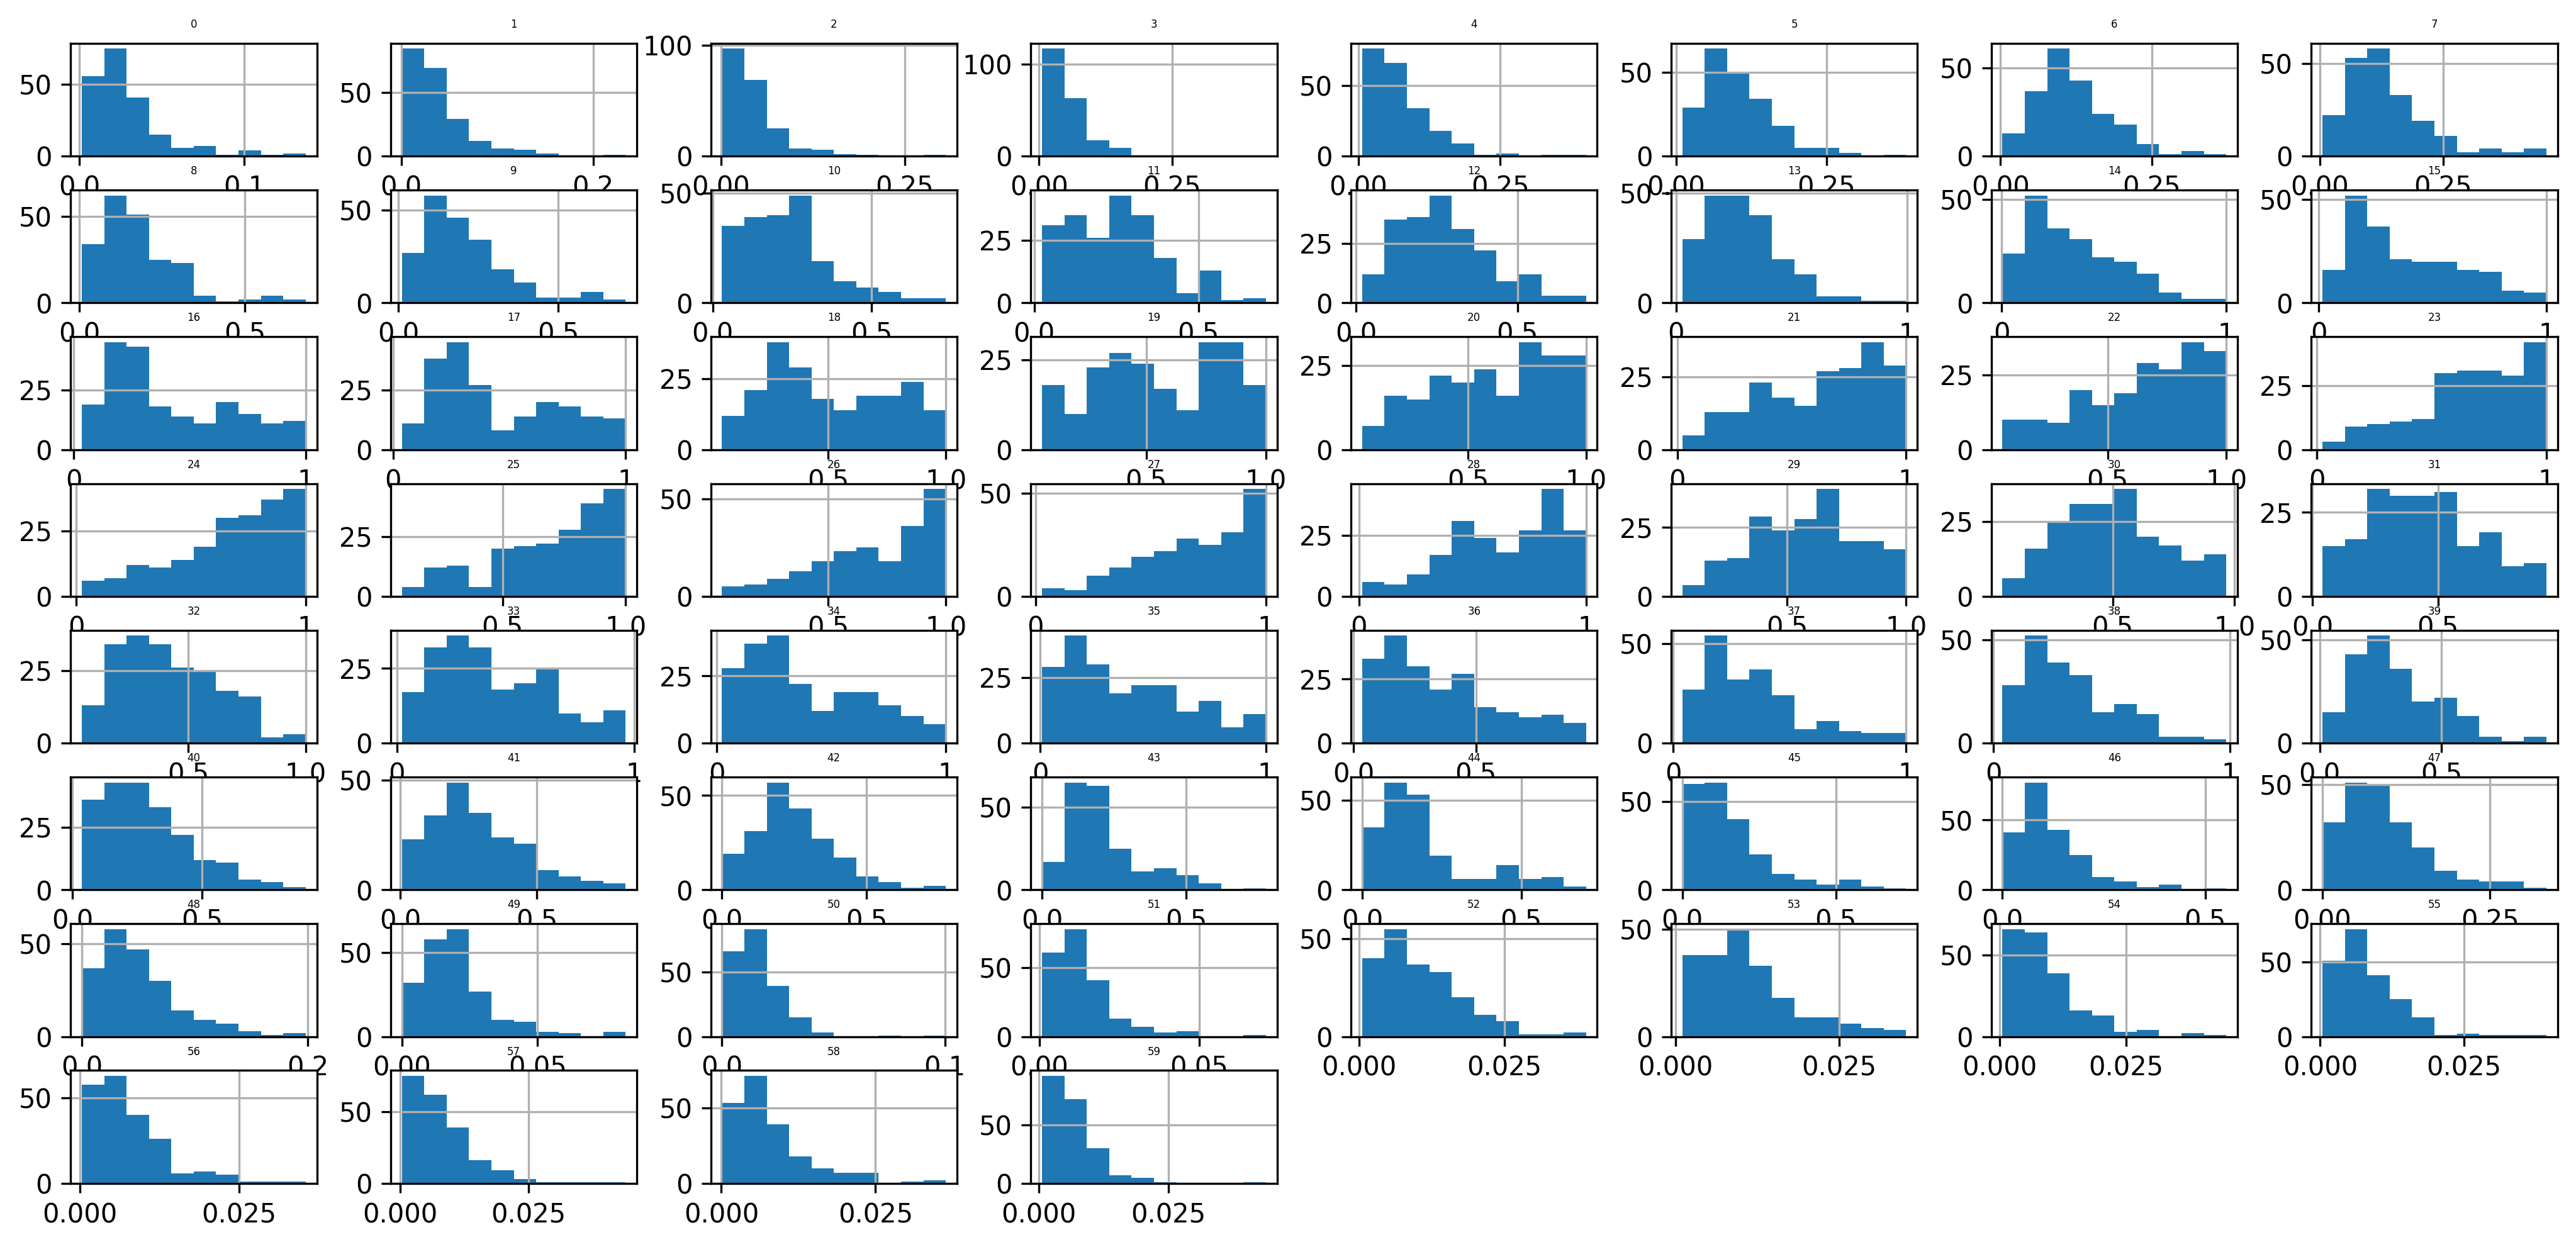

In [4]:
# histograms of the variables
fig = dataset.hist(xlabelsize = 10, ylabelsize = 10) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

# Evaluate ML model on original data

In [5]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


# Evalute ML model on polynomial feature transform example

In [6]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
print("Dataset shape BEFORE: ", dataset.shape)

# perform a polynomial features transform of the dataset 
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print("Dataset shape AFTER: ", dataset.shape)

Dataset shape BEFORE:  (208, 61)
Dataset shape AFTER:  (208, 39711)



- We can see that our features increased from 61 (60 input features) for the raw dataset to 39,711 features (39,710 input features).



In [7]:
# load dataset
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)



- Running the example, we can see that the polynomial features transform results in a lift in performance from 79.7 percent accuracy 
- Without the transform to about 80.0 percent with the transform.



# Effect of polynomial degree


- The degree of the polynomial dramatically increases the number of input features. 
- To get an idea of how much this impacts the number of features, we can perform the transform with a range of different degrees and compare the number of features in the dataset.



Degree: 5, Features: 8259888


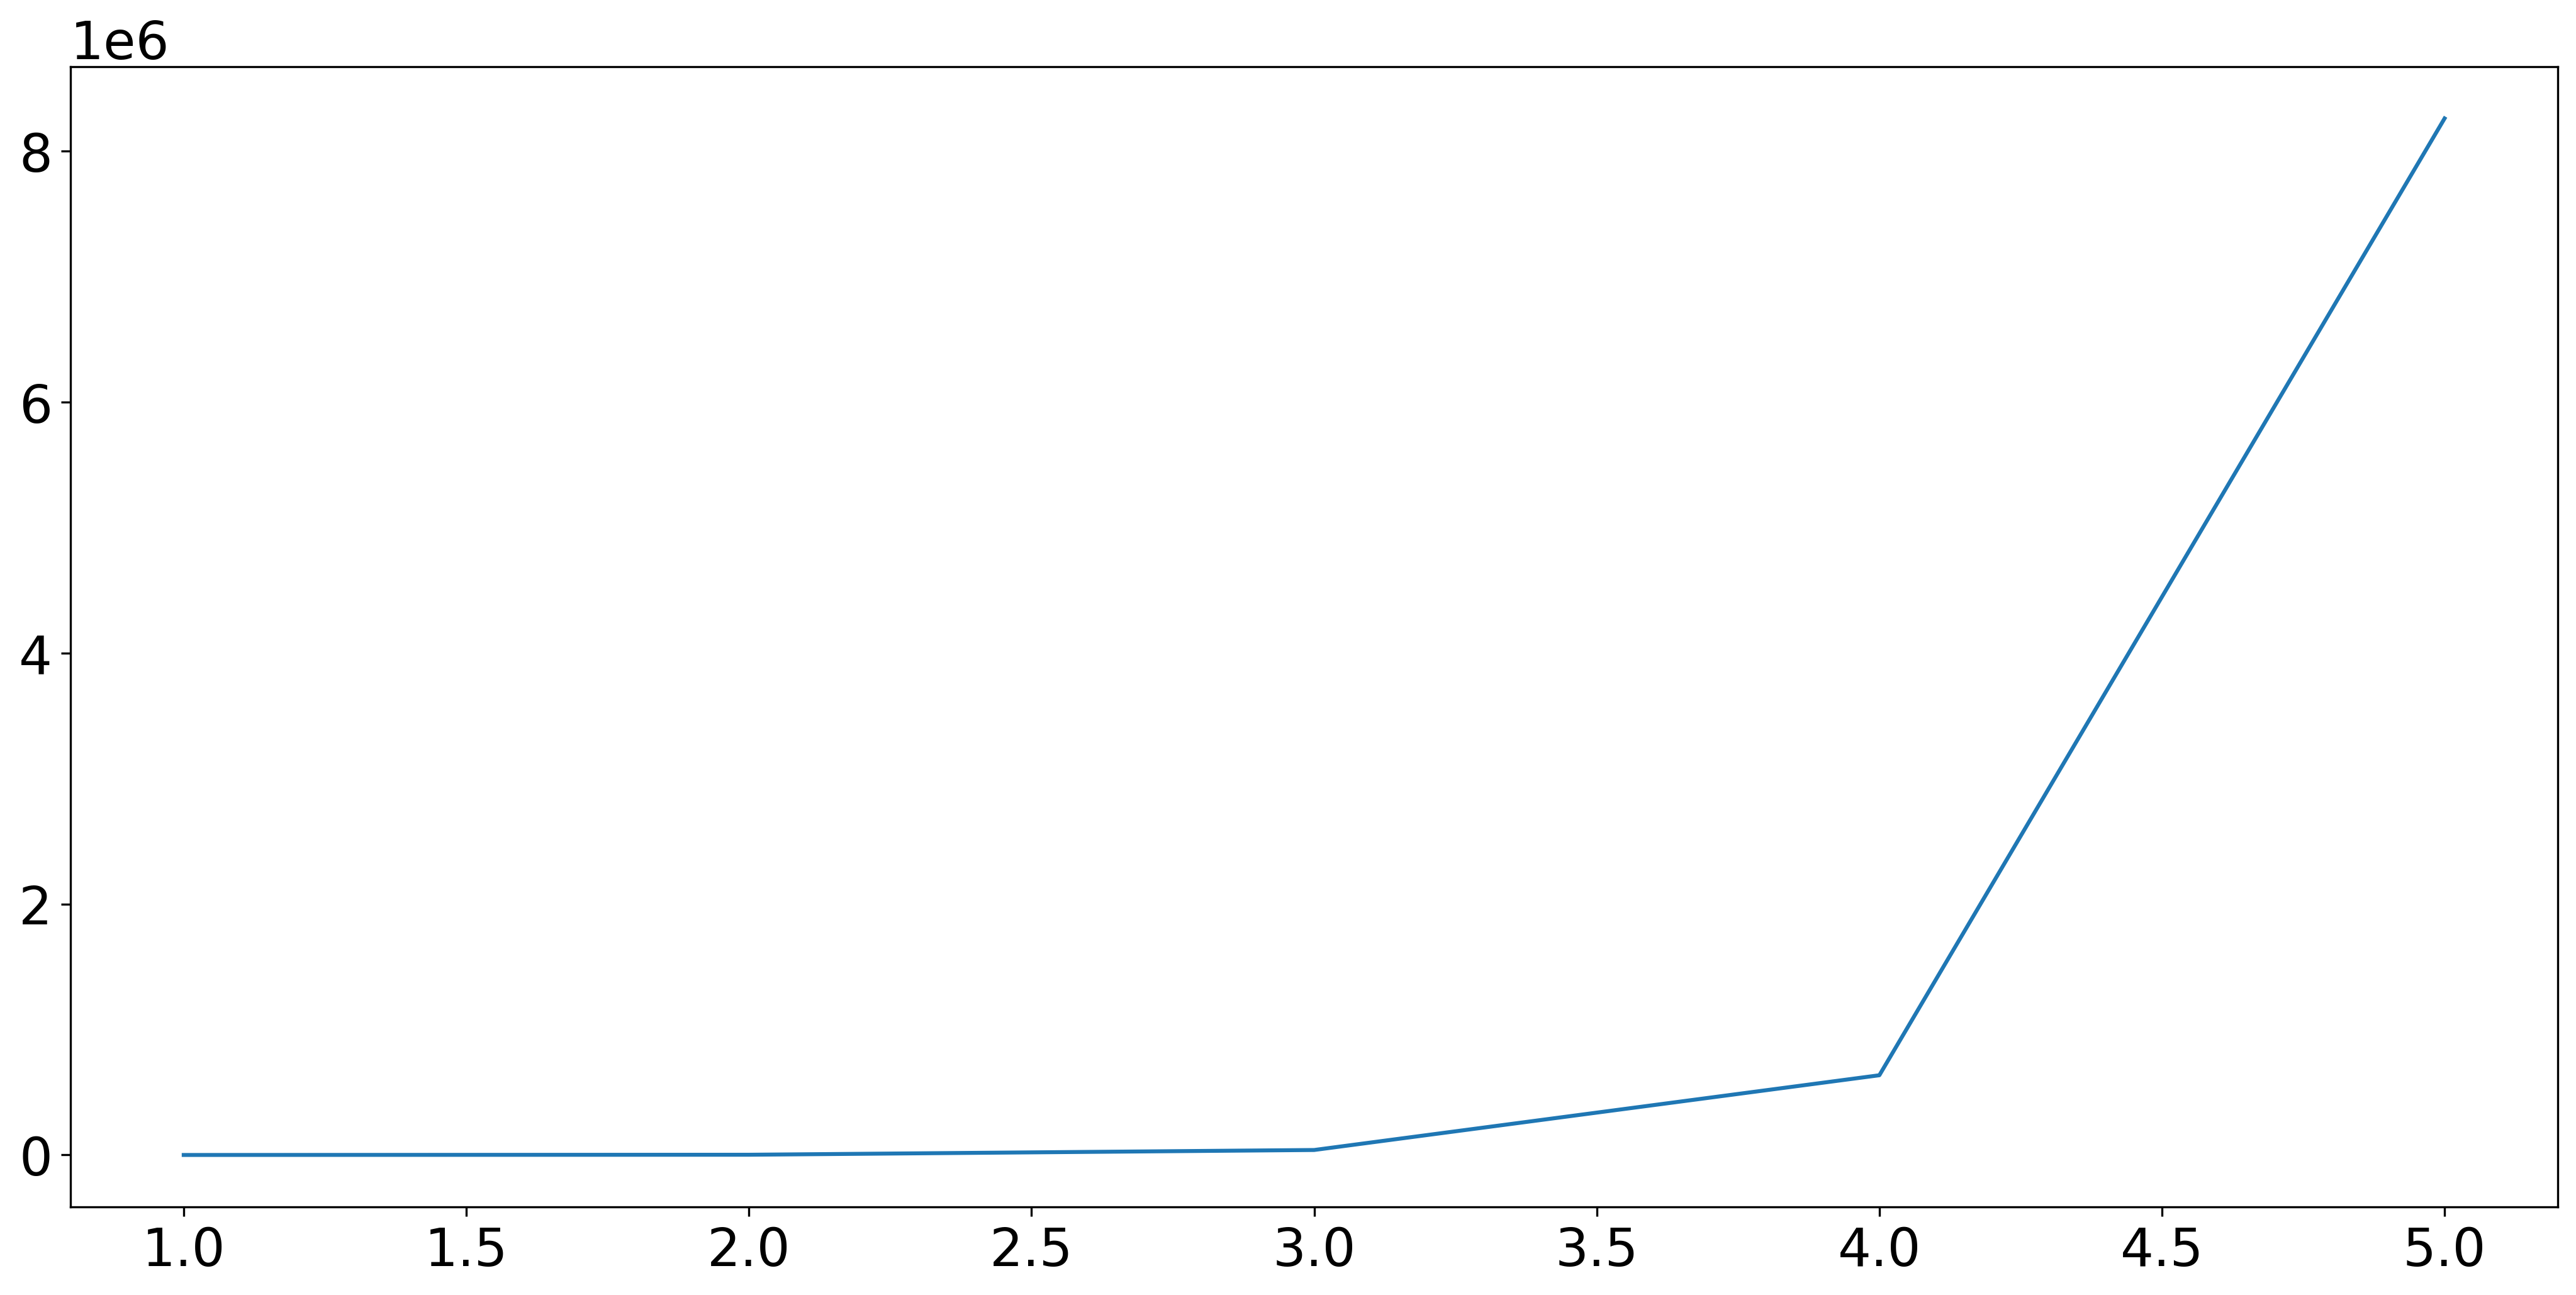

In [8]:
# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# define dataset
X, y = get_dataset('../DATASETS/sonar.csv')

# calculate change in number of features 
num_features = list()
degress = [i for i in range(1, 6)]

for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(X)
    # record number of features
    num_features.append(data.shape[1])

# summarize
print('Degree: %d, Features: %d' % (d, data.shape[1])) # plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()


- More features may result in more overfitting, and in turn, worse results. 
- It may be a good idea to treat the degree for the polynomial features transform as a hyperparameter and test different values for your dataset. 
- The example below explores degree values from 1 to 4 and evaluates their effect on classification accuracy with the chosen model



# Try different degrees in a loop

In [9]:
# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for d in range(1,5):
        # define the pipeline
        trans = PolynomialFeatures(degree=d)
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores


# define dataset
X, y = get_dataset('../DATASETS/sonar.csv')
# get the models to evaluate
models = get_models()

# evaluate the models and store results 

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)
>4 0.795 (0.079)


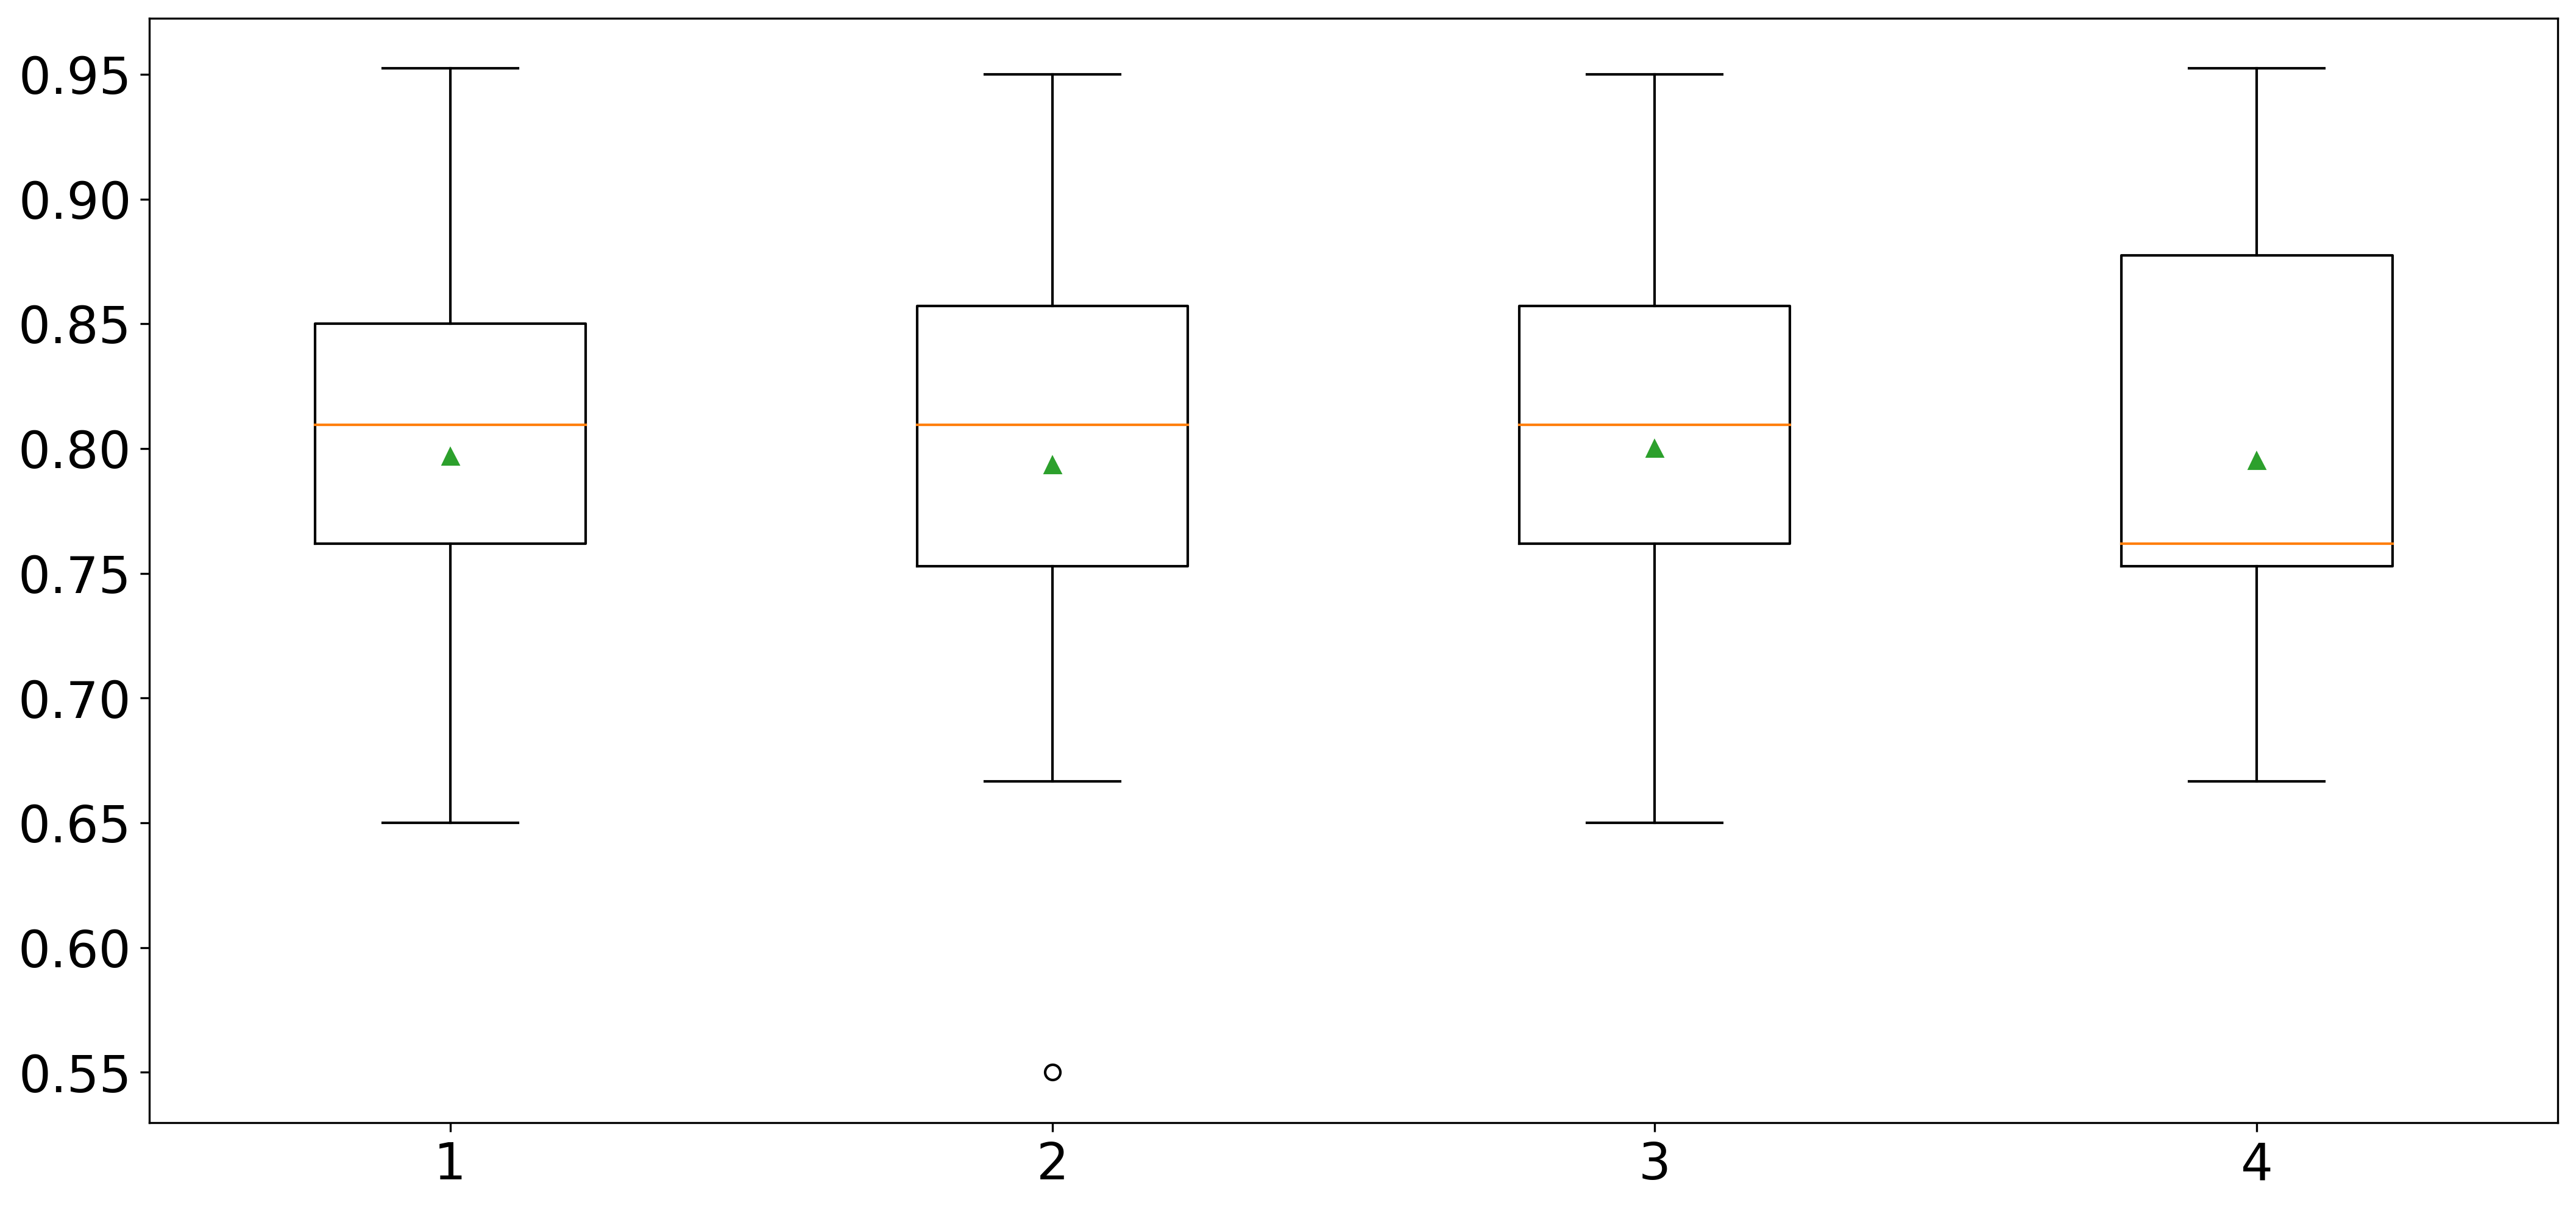

In [10]:
# plot model performance for comparison 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show()

# References


- Data preparation for machine learning, Jason Brownlee

